In [1]:
import pickle
import matplotlib.pyplot as plt


In [2]:
with open('./ablation_metrics/1B_ablate.pickle', 'rb') as f:
    metrics1b = pickle.load(f)

with open('./ablation_metrics/1C_ablate.pickle', 'rb') as f:
    metrics1c = pickle.load(f)

with open('./ablation_metrics/2A_ablate.pickle', 'rb') as f:
    metrics2a = pickle.load(f)
with open('./ablation_metrics/2B_ablate.pickle', 'rb') as f:
    metrics2b = pickle.load(f)

In [23]:
mrrs = {}

for k, v in metrics1c.items():
    if k == 'last':
        k = 1000
    mrrs[int(k)] = v['MRR']

In [24]:
sorted(mrrs.items())

[(49, 0.6364150793650794),
 (99, 0.7059269841269842),
 (149, 0.6087880952380953),
 (199, 0.6572539682539682),
 (249, 0.7232269841269842)]

In [3]:
metrics1c.pop('last')
metrics1b.pop('last')

{'MRR': 0.4445753968253969,
 'MAP': 0.2944284411884412,
 'P@1': 0.324,
 'P@3': 0.30066666666666664,
 'P@5': 0.2881,
 'P@15': 0.28752470584970585,
 'EnrichCorrectedMRR': 0.18612556144341286,
 'EnrichOriginalMRR': 0.15209647736263915,
 'R@1': 0.07990581224331222,
 'R@5': 0.2600812565773244,
 'R@10': 0.2874195872080463}

In [4]:
metrics1b['0'] = {'MRR': 0.014668}
metrics1c['0'] = {'MRR': 0.020819}
metrics2a['0'] = {'MRR': 0.412815}
metrics2b['0'] = {'MRR': 0.420314}


sota_1b = 0.2514
sota_1c = 0.3756
sota_2a = 0.64
sota_2b = 0.7724

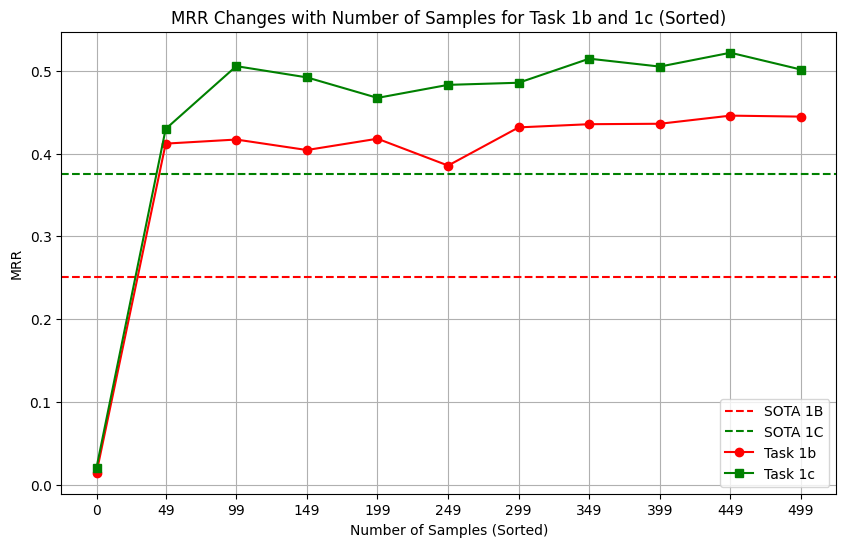

In [11]:
samples_sorted = sorted([int(sample) for sample in metrics1b.keys()])  # Sort sample sizes
mrr_values_1b_sorted = [metrics1b[str(sample)]['MRR'] for sample in samples_sorted]
mrr_values_1c_sorted = [metrics1c[str(sample)]['MRR'] for sample in samples_sorted]

# Plotting with sorted values
plt.figure(figsize=(10, 6))

plt.axhline(y=sota_1b, color='r', linestyle='--', label='SOTA 1B')
plt.axhline(y=sota_1c, color='g', linestyle='--', label='SOTA 1C')

plt.plot(samples_sorted, mrr_values_1b_sorted, label='Task 1b', marker='o', color='r')
plt.plot(samples_sorted, mrr_values_1c_sorted, label='Task 1c', marker='s', color='g')
plt.xlabel('Number of Samples (Sorted)')
plt.ylabel('MRR')
plt.title('MRR Changes with Number of Samples for Task 1b and 1c (Sorted)')
plt.legend()
plt.grid(True)
plt.xticks(samples_sorted)  # Ensure x-ticks are sorted
plt.show()

# 1 - 2 - 5 - 15 - 30 - 50

In [9]:
samples_sorted

[0, 49, 99, 149, 199, 249]

ValueError: x and y must have same first dimension, but have shapes (6,) and (11,)

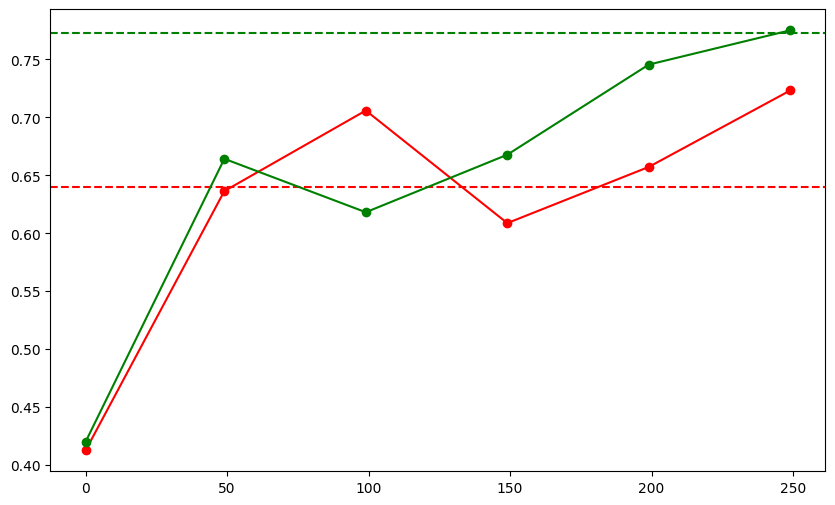

In [8]:
samples_sorted = sorted([int(sample) for sample in metrics2a.keys()])  # Sort sample sizes
mrr_values_2a_sorted = [metrics2a[str(sample)]['MRR'] for sample in samples_sorted]
mrr_values_2b_sorted = [metrics2b[str(sample)]['MRR'] for sample in samples_sorted]


# Plotting with sorted values
plt.figure(figsize=(10, 6))

plt.axhline(y=sota_2a, color='r', linestyle='--', label='SOTA 2A')
plt.axhline(y=sota_2b, color='g', linestyle='--', label='SOTA 2B')


plt.plot(samples_sorted, mrr_values_2a_sorted, label='Task 2A', marker='o', color='r')
plt.plot(samples_sorted, mrr_values_2b_sorted, label='Task 2B', marker='o', color='g')
plt.plot(samples_sorted, mrr_values_1c_sorted, label='Task 1c', marker='s', color='b')
plt.xlabel('Number of Samples (Sorted)')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.xticks(samples_sorted)  # Ensure x-ticks are sorted
plt.show()